In [519]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import random

In [520]:
data = pd.read_csv("train.csv")

In [521]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [522]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [7]:
X_train[:, 0].shape

(784,)

In [523]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2./784)  
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2./128)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z = Z - np.max(Z, axis=0, keepdims=True) 
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [524]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    vW1, vW2, vb1, vb2 = 0, 0, 0, 0
    beta = 0.9
    

    mW1, mW2, mb1, mb2 = 0, 0, 0, 0
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    
    alpha_0 = 0.001 
    
    for i in range(iterations):
        alpha = alpha_0 / (1 + 0.001 * i) 
        
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        
        lambda_reg = 0.001 
        dW1 += (lambda_reg * W1)
        dW2 += (lambda_reg * W2)
        
        mW1 = beta1 * mW1 + (1-beta1) * dW1
        mW2 = beta1 * mW2 + (1-beta1) * dW2
        mb1 = beta1 * mb1 + (1-beta1) * db1
        mb2 = beta1 * mb2 + (1-beta1) * db2
        
        vW1 = beta2 * vW1 + (1-beta2) * (dW1**2)
        vW2 = beta2 * vW2 + (1-beta2) * (dW2**2)
        vb1 = beta2 * vb1 + (1-beta2) * (db1**2)
        vb2 = beta2 * vb2 + (1-beta2) * (db2**2)
        
        t = i + 1
        mW1_corr = mW1 / (1-beta1**t)
        mW2_corr = mW2 / (1-beta1**t)
        mb1_corr = mb1 / (1-beta1**t)
        mb2_corr = mb2 / (1-beta1**t)
        
        vW1_corr = vW1 / (1-beta2**t)
        vW2_corr = vW2 / (1-beta2**t)
        vb1_corr = vb1 / (1-beta2**t)
        vb2_corr = vb2 / (1-beta2**t)

        W1 = W1 - alpha * mW1_corr / (np.sqrt(vW1_corr) + epsilon)
        W2 = W2 - alpha * mW2_corr / (np.sqrt(vW2_corr) + epsilon)
        b1 = b1 - alpha * mb1_corr / (np.sqrt(vb1_corr) + epsilon)
        b2 = b2 - alpha * mb2_corr / (np.sqrt(vb2_corr) + epsilon)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y):.3f}")
    
    return W1, b1, W2, b2

In [525]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.001, 2000)

Iteration:  0
[5 3 3 ... 5 4 0] [7 3 9 ... 9 6 5]
Accuracy: 0.081
Iteration:  10
[7 3 7 ... 8 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.720
Iteration:  20
[7 3 7 ... 8 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.834
Iteration:  30
[7 3 7 ... 9 8 5] [7 3 9 ... 9 6 5]
Accuracy: 0.868
Iteration:  40
[7 3 7 ... 9 8 5] [7 3 9 ... 9 6 5]
Accuracy: 0.887
Iteration:  50
[7 3 7 ... 9 8 5] [7 3 9 ... 9 6 5]
Accuracy: 0.901
Iteration:  60
[7 3 7 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.910
Iteration:  70
[7 3 7 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.916
Iteration:  80
[7 3 7 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.921
Iteration:  90
[7 3 7 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.926
Iteration:  100
[7 3 7 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.930
Iteration:  110
[7 3 9 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.934
Iteration:  120
[7 3 9 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.937
Iteration:  130
[7 3 9 ... 9 6 5] [7 3 9 ... 9 6 5]
Accuracy: 0.939
Iteration:  140
[7 3 9 ... 9 6 5] [7 3 9 ... 9 6 5]
Accurac

In [526]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


Prediction:  9
Actual Label:  9


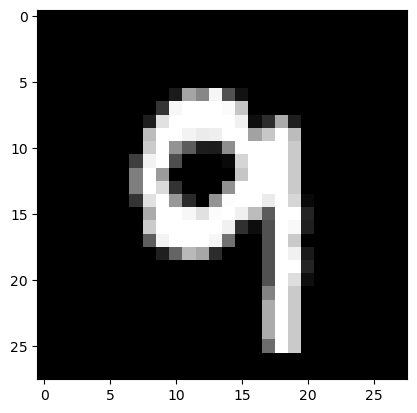

In [527]:
def test_random_image(X, Y, W1, b1, W2, b2):
    # Randomly select an index from the dataset
    index = random.randint(0, X.shape[1] - 1)
    
    # Get the image and label
    current_image = X[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y[index]
    
    # Print the prediction and label
    print("Prediction: ", prediction[0])
    print("Actual Label: ", label)
    
    # Display the image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Call the function
test_random_image(X_train, Y_train, W1, b1, W2, b2)


In [530]:
def create_submission_file(X_test, W1, b1, W2, b2, filename="submission.csv"):
    # Get predictions for test data
    predictions = make_predictions(X_test, W1, b1, W2, b2)
    
    # Create DataFrame with ImageId and Label columns
    submission_df = pd.DataFrame({
        'ImageId': range(1, len(predictions) + 1),
        'Label': predictions
    })
    
    # Save to CSV file
    submission_df.to_csv(filename, index=False)
    print(f"Submission file created: {filename}")

# First load and preprocess your test data
test_data = pd.read_csv("test.csv")
X_test = np.array(test_data).T
X_test = X_test / 255.  # Normalize the test data

# Create the submission file
create_submission_file(X_test, W1, b1, W2, b2)

Submission file created: submission.csv


In [528]:


def model_summary(layer_sizes):
    total_params = 0
    print("Model Summary:")
    print("=" * 80)
    print(f"{'Layer':<20} {'Output Shape':<20} {'Params':<20}")
    print("=" * 80)
    
    # Input layer
    print(f"{'Input':<20} {(None, layer_sizes[0])!s:<20} {'0':<20}")
    
    # Hidden layers and output layer
    for i in range(1, len(layer_sizes)):
        params = layer_sizes[i-1] * layer_sizes[i] + layer_sizes[i]  # weights + biases
        total_params += params
        layer_name = 'Output' if i == len(layer_sizes)-1 else f'Dense_{i}'
        print(f"{layer_name:<20} {(None, layer_sizes[i])!s:<20} {params:<20}")
    
    print("=" * 80)
    print(f"Total params: {total_params:,}")
    print(f"Trainable params: {total_params:,}")
    print(f"Non-trainable params: 0")

# Define your architecture
layer_sizes = [784, 512, 256, 128, 10]
# Print model summary
model_summary(layer_sizes)

Model Summary:
Layer                Output Shape         Params              
Input                (None, 784)          0                   
Dense_1              (None, 512)          401920              
Dense_2              (None, 256)          131328              
Dense_3              (None, 128)          32896               
Output               (None, 10)           1290                
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0


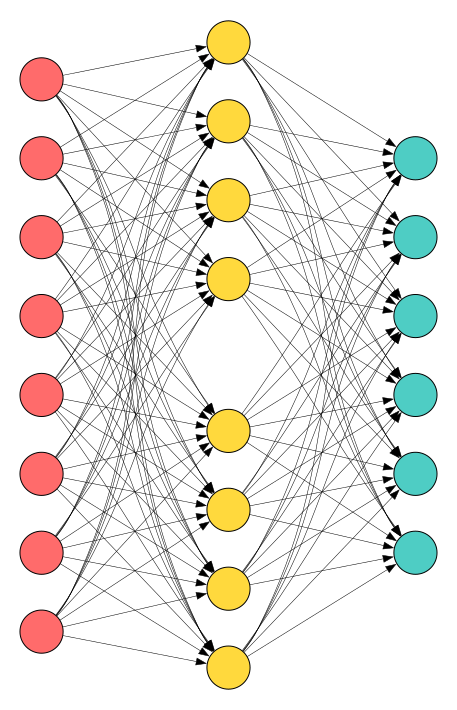

In [529]:
def visualize_neural_net(layer_sizes=[784, 128, 10]):
    dot = graphviz.Digraph(comment='Neural Network Architecture')
    dot.attr(rankdir='LR', ranksep='2', nodesep='0.5')
    
    # Define node styles
    dot.attr('node', shape='circle', fixedsize='true', width='0.6')
    
    # Create nodes for each layer
    for i, size in enumerate(layer_sizes):
        with dot.subgraph(name=f'cluster_{i}') as c:
            c.attr(style='invis')
            
            # Show more representative neurons
            if size > 8:
                # Show more neurons (4 at top and bottom)
                for j in range(4):
                    c.node(f'L{i}_{j}', '', 
                          fillcolor=('#ff6b6b' if i == 0 else
                                   '#4ecdc4' if i == len(layer_sizes)-1 else
                                   '#ffd93d'),
                          style='filled')
                
                c.node(f'L{i}_dots', '⋮', shape='none')
                
                for j in range(4):
                    idx = size - 4 + j
                    c.node(f'L{i}_{idx}', '', 
                          fillcolor=('#ff6b6b' if i == 0 else
                                   '#4ecdc4' if i == len(layer_sizes)-1 else
                                   '#ffd93d'),
                          style='filled')
            else:
                for j in range(size):
                    c.node(f'L{i}_{j}', '', 
                          fillcolor=('#ff6b6b' if i == 0 else
                                   '#4ecdc4' if i == len(layer_sizes)-1 else
                                   '#ffd93d'),
                          style='filled')
    
    # Add edges with darker lines
    for i in range(len(layer_sizes)-1):
        if layer_sizes[i] > 8:
            current_nodes = list(range(4)) + list(range(layer_sizes[i]-4, layer_sizes[i]))
        else:
            current_nodes = range(layer_sizes[i])
            
        if layer_sizes[i+1] > 8:
            next_nodes = list(range(4)) + list(range(layer_sizes[i+1]-4, layer_sizes[i+1]))
        else:
            next_nodes = range(layer_sizes[i+1])
        
        # Create all possible connections between nodes with darker lines
        for j in current_nodes:
            for k in next_nodes:
                if isinstance(j, int) and isinstance(k, int):
                    dot.edge(f'L{i}_{j}', f'L{i+1}_{k}', 
                           color='#000000',  # Solid black
                           penwidth='0.5')  # Slightly thicker lines
    
    return dot

# Test with a medium-sized network
try:
    net = visualize_neural_net([8, 10, 6])
    display(net)
    
    # Uncomment for full network
    # net = visualize_neural_net([784, 128, 10])
    # display(net)
except Exception as e:
    print(f"Error creating visualization: {str(e)}")